In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Load the CSV file
file_path = "Resources/ds_salaries.csv"
data = pd.read_csv(file_path)

In [3]:
pd.set_option('display.max_rows', None)
styled_data = data.style.set_table_styles([
    {'selector': 'th', 'props': [('font-size', '12pt'), ('text-align', 'center')]},
    {'selector': 'td', 'props': [('font-size', '10pt'), ('text-align', 'center')]}
])

styled_data

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


In [4]:
# Define legends for employment types and experience levels
employment_labels = {'FT': 'Full-time', 'PT': 'Part-time', 'CT': 'Contract', 'FL': 'Freelance'}
experience_labels = {'EN': 'Entry', 'MI': 'Mid', 'SE': 'Senior', 'EX': 'Executive'}

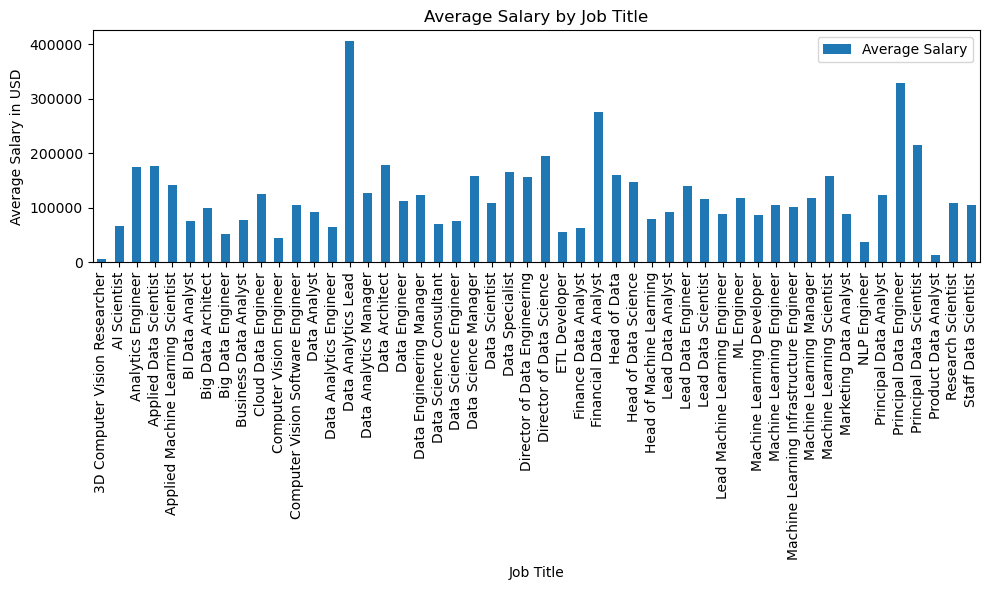

In [43]:
# Plotting Bar chart comparing average salaries to job titles
plt.figure(figsize=(10, 6))
avg_salaries = data.groupby('job_title')['salary_in_usd'].mean()
avg_salaries.plot(kind='bar')
plt.title('Average Salary by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=90)
plt.legend(['Average Salary'])
plt.tight_layout()
plt.show()

In [44]:
# Pie chart for the percentage of remote, hybrid, and in-office work
remote_counts = data['remote_ratio'].value_counts()
remote_labels = {0: '100% In Office', 50: '50% Hybrid', 100: '100% Remote'}
remote_counts.index = remote_counts.index.map(remote_labels)

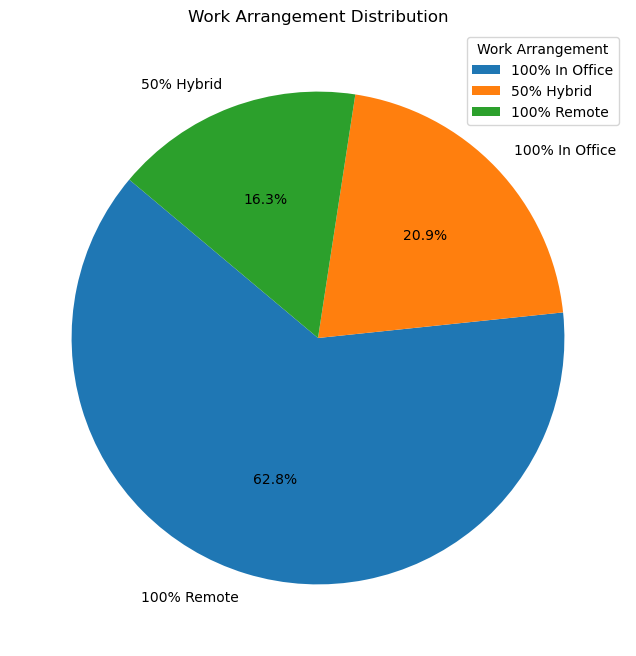

In [46]:
plt.figure(figsize=(10, 8))
plt.pie(remote_counts, labels=remote_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Work Arrangement Distribution')
plt.legend(remote_labels.values(), title='Work Arrangement')
plt.show()

In [47]:
# Pie chart for employment types with the provided legend
employment_counts = data['employment_type'].value_counts()
employment_counts.index = employment_counts.index.map(employment_labels)

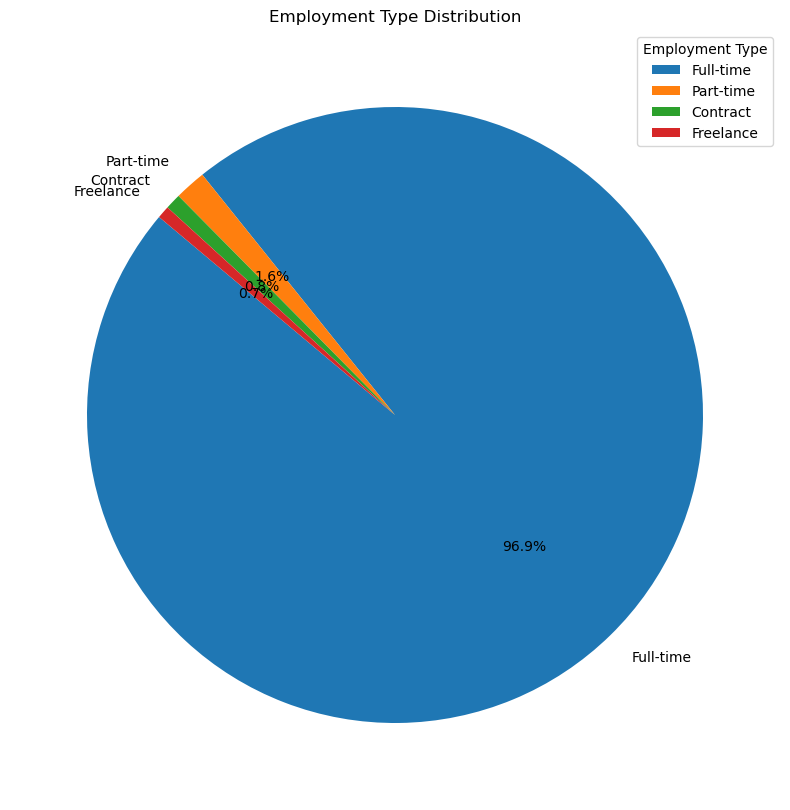

In [51]:
plt.figure(figsize=(12, 10))
plt.pie(employment_counts, labels=employment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Employment Type Distribution')
plt.legend(employment_labels.values(), title='Employment Type')
plt.show()

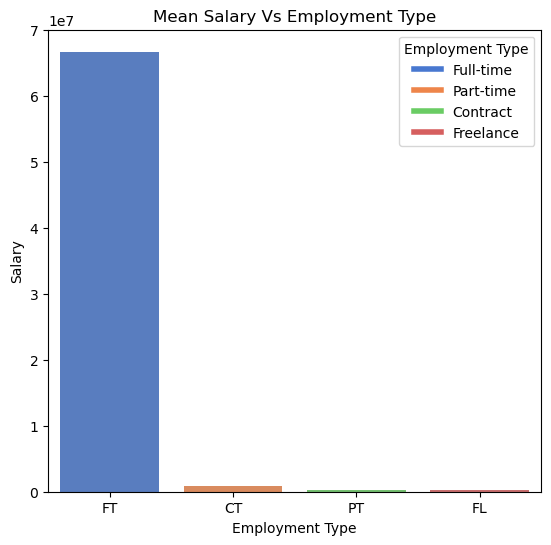

In [71]:
# Subplot 1: Mean Salary vs Employment Type
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
palette = sns.color_palette('muted', n_colors=len(employment_labels))
sns.barplot(x='employment_type', y='salary_in_usd', data=data, estimator=sum, errorbar=None, palette=palette)
plt.title('Mean Salary Vs Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary')
colors = sns.color_palette('muted', len(employment_labels))
handles = [plt.Line2D([0], [0], color=colors[i], lw=4) for i in range(len(employment_labels))]
plt.legend(handles, employment_labels.values(), title='Employment Type')

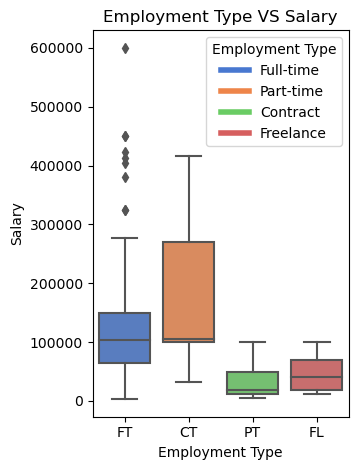

In [72]:
# Subplot 2: Employment Type VS Salary
plt.subplot(1, 2, 2)
sns.boxplot(x='employment_type', y='salary_in_usd', data=data, palette=palette)
plt.title('Employment Type VS Salary')
plt.xlabel('Employment Type')
plt.ylabel('Salary')
plt.legend(handles, employment_labels.values(), title='Employment Type')
plt.tight_layout()
plt.show()

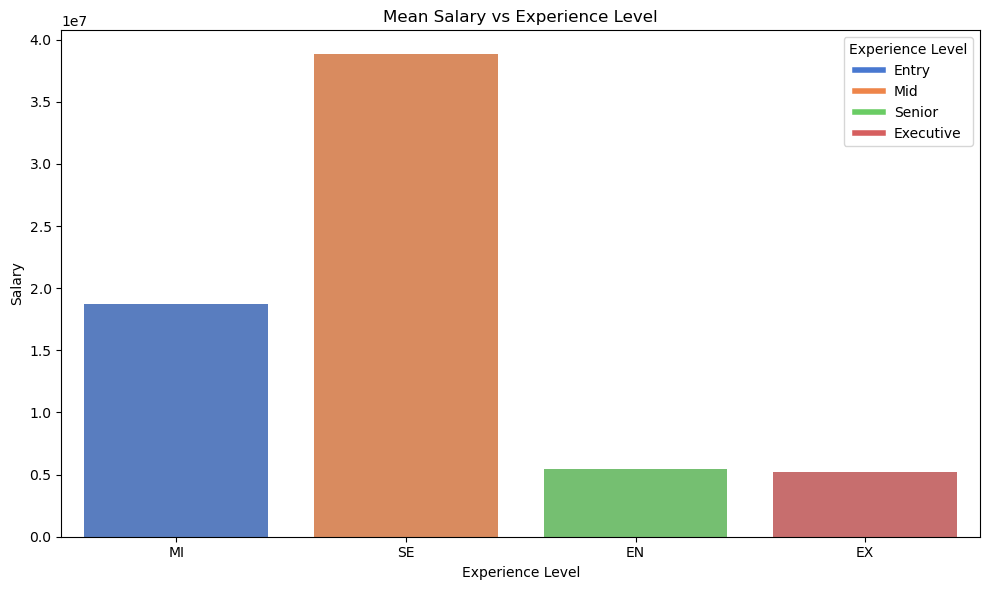

In [74]:
# Bar chart for Mean Salary vs Experience Level
plt.figure(figsize=(10, 6))
palette = sns.color_palette('muted', n_colors=len(experience_labels))
barplot = sns.barplot(x='experience_level', y='salary_in_usd', data=data, estimator=sum, errorbar=None, palette=palette)
plt.title('Mean Salary vs Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
handles = [plt.Line2D([0], [0], color=palette[i], lw=4) for i in range(len(experience_labels))]
plt.legend(handles, experience_labels.values(), title='Experience Level')
plt.tight_layout()
plt.show()

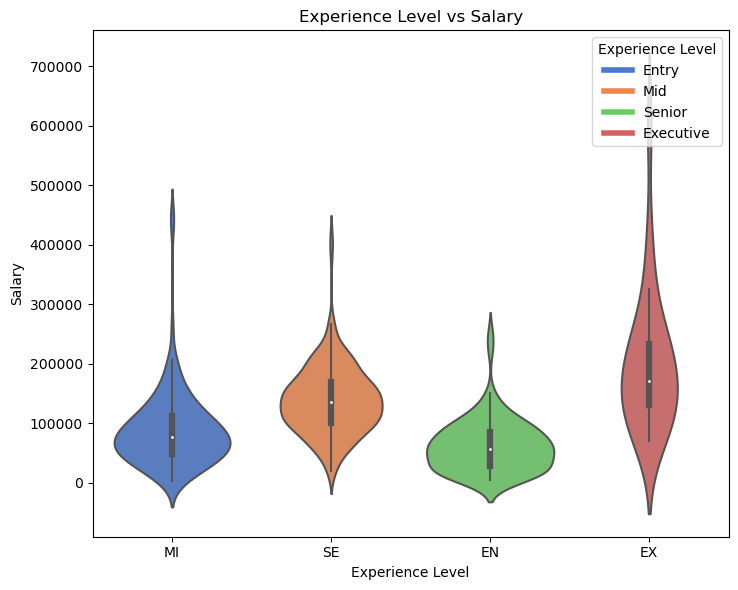

In [80]:
# Subplot 2: Experience Level vs Salary
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
violin = sns.violinplot(x='experience_level', y='salary_in_usd', data=data, palette=experience_palette)
plt.title('Experience Level vs Salary')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
handles = [plt.Line2D([0], [0], color=experience_palette[i], lw=4) for i in range(len(experience_labels))]
plt.legend(handles, experience_labels.values(), title='Experience Level')
plt.tight_layout()
plt.show()